# Network Data Strategist

This report covers 


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [11]:
#Import from csv
nwda_growth_df = pd.read_csv('NWEA_Growth.csv')
#Original df
nwda_growth_df

,School ID,School Name,Network,Subject,Grade,2014 # Tested,2014 % Students Making National Average Growth,2014 National School Growth Percentile,2015 # Tested,2015 % Students Making National Average Growth,2015 National School Growth Percentile,2016 # Tested,2016 % Students Making National Average Growth,2016 National School Growth Percentile
0,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 3,42.0,66.7,27.0,35.0,22.9,3.0,36.0,75.0,96.0
1,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 4,44.0,63.6,65.0,43.0,46.5,37.0,39.0,74.4,91.0
2,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 5,46.0,69.6,91.0,44.0,34.1,13.0,45.0,44.4,29.0
3,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 6,47.0,83.0,92.0,48.0,54.2,47.0,42.0,59.5,61.0
4,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 7,42.0,23.8,2.0,44.0,81.8,99.0,41.0,80.5,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6614,610588.0,RICHARDSON,Network 10,READING,Grade 6,NaN,NaN,NaN,NaN,NaN,NaN,229.0,52.0,44.0
6615,610588.0,RICHARDSON,Network 10,READING,Grade 7,NaN,NaN,NaN,NaN,NaN,NaN,240.0,50.8,36.0
6616,610588.0,RICHARDSON,Network 10,READING,Grade 8,NaN,NaN,NaN,NaN,NaN,NaN,246.0,62.6,74.0
6617,610588.0,RICHARDSON,Network 10,READING,Grades 3-8 Combined,NaN,NaN,NaN,NaN,NaN,NaN,987.0,54.2,52.0


In [12]:
#Drop null values
nwda_growth_df.dropna(inplace=True)

In [13]:
#Create dataframe for only combined grades. Grades 3-8 Combined
combined_df = nwda_growth_df[nwda_growth_df['Grade'].str.lower().str.contains('combined')]
combined_df.head()
#968 rows

,School ID,School Name,Network,Subject,Grade,2014 # Tested,2014 % Students Making National Average Growth,2014 National School Growth Percentile,2015 # Tested,2015 % Students Making National Average Growth,2015 National School Growth Percentile,2016 # Tested,2016 % Students Making National Average Growth,2016 National School Growth Percentile
6,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grades 3-8 Combined,221.0,62.0,60.0,255.0,52.5,50.0,248.0,62.1,76.0
13,400009.0,GLOBAL CITIZENSHIP,Charter,READING,Grades 3-8 Combined,223.0,56.5,80.0,255.0,52.9,46.0,247.0,69.6,94.0
27,400017.0,ASPIRA - HAUGAN,Charter,MATH,Grades 3-8 Combined,496.0,46.6,33.0,451.0,52.8,39.0,424.0,48.2,35.0
31,400017.0,ASPIRA - HAUGAN,Charter,READING,Grades 3-8 Combined,495.0,57.0,62.0,452.0,47.6,30.0,425.0,51.9,46.0
66,400021.0,CATALYST - CIRCLE ROCK,Charter,MATH,Grades 3-8 Combined,329.0,31.3,6.0,324.0,55.2,65.0,326.0,42.6,28.0


In [14]:
#Dataframe without combined grades
clean_df = nwda_growth_df[~nwda_growth_df['Grade'].str.lower().str.contains('combined')]
clean_df
#5,317 rows

,School ID,School Name,Network,Subject,Grade,2014 # Tested,2014 % Students Making National Average Growth,2014 National School Growth Percentile,2015 # Tested,2015 % Students Making National Average Growth,2015 National School Growth Percentile,2016 # Tested,2016 % Students Making National Average Growth,2016 National School Growth Percentile
0,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 3,42.0,66.7,27.0,35.0,22.9,3.0,36.0,75.0,96.0
1,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 4,44.0,63.6,65.0,43.0,46.5,37.0,39.0,74.4,91.0
2,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 5,46.0,69.6,91.0,44.0,34.1,13.0,45.0,44.4,29.0
3,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 6,47.0,83.0,92.0,48.0,54.2,47.0,42.0,59.5,61.0
4,400009.0,GLOBAL CITIZENSHIP,Charter,MATH,Grade 7,42.0,23.8,2.0,44.0,81.8,99.0,41.0,80.5,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,610559.0,SHIELDS MIDDLE,Network 8,MATH,Grade 8,153.0,75.2,86.0,131.0,74.0,90.0,137.0,53.3,59.0
6593,610559.0,SHIELDS MIDDLE,Network 8,READING,Grade 5,178.0,45.5,14.0,152.0,42.1,12.0,106.0,48.1,22.0
6594,610559.0,SHIELDS MIDDLE,Network 8,READING,Grade 6,148.0,65.5,76.0,171.0,57.9,85.0,137.0,73.7,97.0
6595,610559.0,SHIELDS MIDDLE,Network 8,READING,Grade 7,132.0,64.4,83.0,149.0,51.0,46.0,165.0,60.0,68.0


In [15]:
combined_df.columns.to_list()

['School ID',
 'School Name',
 'Network',
 'Subject',
 'Grade',
 '2014 # Tested',
 '2014 % Students Making National Average Growth',
 '2014 National School Growth Percentile',
 '2015 # Tested',
 '2015 % Students Making National Average Growth',
 '2015 National School Growth Percentile',
 '2016 # Tested',
 '2016 % Students Making National Average Growth',
 '2016 National School Growth Percentile']

# Scatterplot for Grades 3-8 Combined 

### Scatterplot for Grades 3-8 Combined 2014


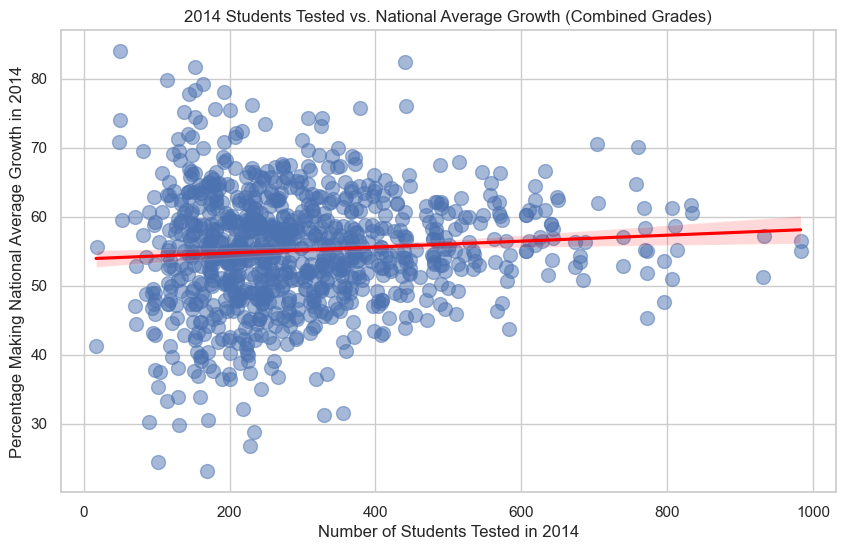

In [16]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot for 2014
plt.figure(figsize=(10, 6))
sns.regplot(x='2014 # Tested', y='2014 % Students Making National Average Growth', 
            data=combined_df, scatter_kws={'s': 100, 'alpha':0.5}, line_kws={'color': 'red'})
plt.title('2014 Students Tested vs. National Average Growth (Combined Grades)')
plt.xlabel('Number of Students Tested in 2014')
plt.ylabel('Percentage Making National Average Growth in 2014')
plt.show()

I want to see the actual percentage number

In [17]:
x = combined_df['2014 # Tested']
y = combined_df['2014 % Students Making National Average Growth']

# Fit a polynomial of degree 1 (line) to the data
slope, intercept = np.polyfit(x, y, 1)

# Now you can use the slope and intercept to find the exact percentages
# For example, to find the percentage at the minimum and maximum x-values:
start_percentage = slope * x.min() + intercept
end_percentage = slope * x.max() + intercept

start_percentage, end_percentage

(53.956310002772, 58.11382956533232)

### Scatterplot for Grades 3-8 Combined 2015

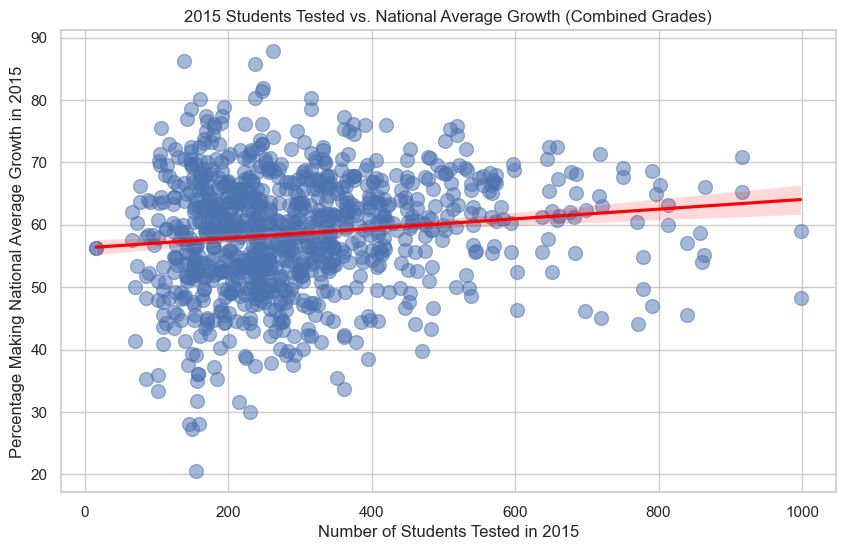

In [18]:
# Plot for 2015
plt.figure(figsize=(10, 6))
sns.regplot(x='2015 # Tested', y='2015 % Students Making National Average Growth', 
            data=combined_df, scatter_kws={'s': 100, 'alpha':0.5}, line_kws={'color': 'red'})
plt.title('2015 Students Tested vs. National Average Growth (Combined Grades)')
plt.xlabel('Number of Students Tested in 2015')
plt.ylabel('Percentage Making National Average Growth in 2015')
plt.show()

In [19]:
x = combined_df['2015 # Tested']
y = combined_df['2015 % Students Making National Average Growth']

# Fit a polynomial of degree 1 (line) to the data
slope, intercept = np.polyfit(x, y, 1)

# Now you can use the slope and intercept to find the exact percentages
# For example, to find the percentage at the minimum and maximum x-values:
start_percentage = slope * x.min() + intercept
end_percentage = slope * x.max() + intercept

start_percentage, end_percentage


(56.40554705285695, 64.0375204677674)

### Scatterplot for Grades 3-8 Combined 2016

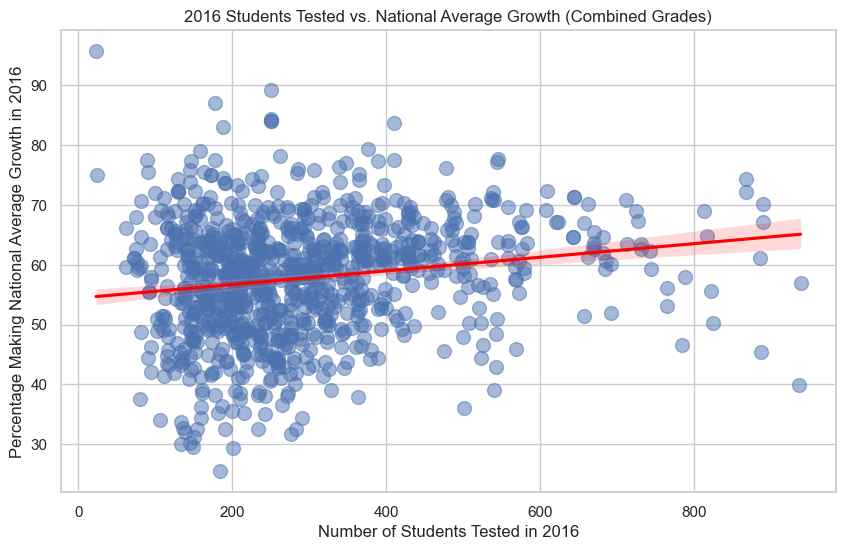

In [20]:
# Plot for 2016
plt.figure(figsize=(10, 6))
sns.regplot(x='2016 # Tested', y='2016 % Students Making National Average Growth', 
            data=combined_df, scatter_kws={'s': 100, 'alpha':0.5}, line_kws={'color': 'red'})
plt.title('2016 Students Tested vs. National Average Growth (Combined Grades)')
plt.xlabel('Number of Students Tested in 2016')
plt.ylabel('Percentage Making National Average Growth in 2016')
plt.show()

In [21]:
x = combined_df['2016 # Tested']
y = combined_df['2016 % Students Making National Average Growth']

# Fit a polynomial of degree 1 (line) to the data
slope, intercept = np.polyfit(x, y, 1)

# Now you can use the slope and intercept to find the exact percentages
# For example, to find the percentage at the minimum and maximum x-values:
start_percentage = slope * x.min() + intercept
end_percentage = slope * x.max() + intercept

start_percentage, end_percentage


(54.699805137246905, 65.11554051207763)

# Exploration by school name

/var/folders/7g/z4x7tyks1wx4fbmdy902t0840000gn/T/ipykernel_84009/3993579782.py:28: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



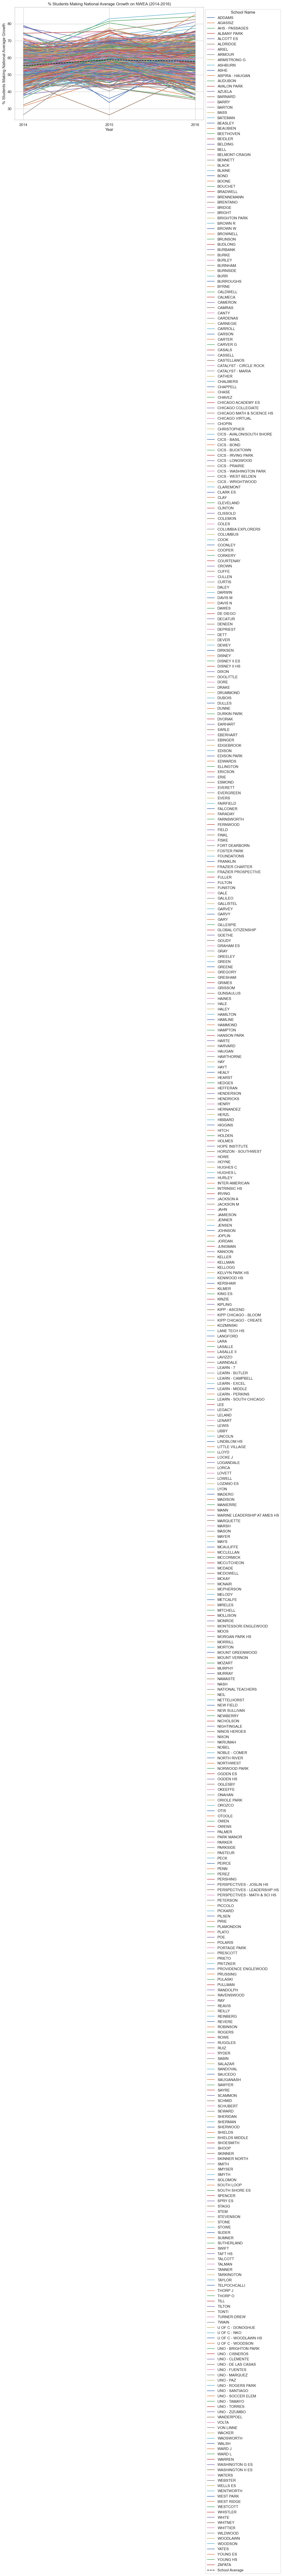

In [22]:
# Step 1: Data Preparation
# Calculate the mean '% Students Making National Average Growth' for each school and each year
school_avg_growth = nwda_growth_df.groupby('School Name')[['2014 % Students Making National Average Growth', 
                                                          '2015 % Students Making National Average Growth', 
                                                          '2016 % Students Making National Average Growth']].mean().reset_index()

# Calculate the overall average across all schools for each year
overall_avg_growth = nwda_growth_df[['2014 % Students Making National Average Growth', 
                                     '2015 % Students Making National Average Growth', 
                                     '2016 % Students Making National Average Growth']].mean()

# Step 2: Create the Chart
plt.figure(figsize=(10, 6))

# Plotting each school's average growth
for index, row in school_avg_growth.iterrows():
    plt.plot(['2014', '2015', '2016'], row[1:], label=row['School Name'])

# Adding the overall school average line
plt.plot(['2014', '2015', '2016'], overall_avg_growth, label='School Average', color='black', linestyle='--')

# Adding titles and labels
plt.title('% Students Making National Average Growth on NWEA (2014-2016)')
plt.xlabel('Year')
plt.ylabel('% Students Making National Average Growth')
plt.legend(title='School Name', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Identify schools with consistently good performance for three years straight


In [23]:
consistently_good_schools = school_avg_growth[
    (school_avg_growth['2014 % Students Making National Average Growth'] < school_avg_growth['2015 % Students Making National Average Growth']) & 
    (school_avg_growth['2015 % Students Making National Average Growth'] < school_avg_growth['2016 % Students Making National Average Growth'])
]

# Display the schools with consistently good performance
consistently_good_schools.head()
#102 rows

,School Name,2014 % Students Making National Average Growth,2015 % Students Making National Average Growth,2016 % Students Making National Average Growth
1,AGASSIZ,52.850000,62.471429,68.271429
4,ALCOTT ES,62.592857,66.407143,68.271429
6,ARIEL,49.350000,51.150000,58.485714
14,AZUELA,53.650000,56.078571,63.014286
20,BEASLEY,50.500000,52.557143,52.950000


/var/folders/7g/z4x7tyks1wx4fbmdy902t0840000gn/T/ipykernel_84009/1540140798.py:16: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



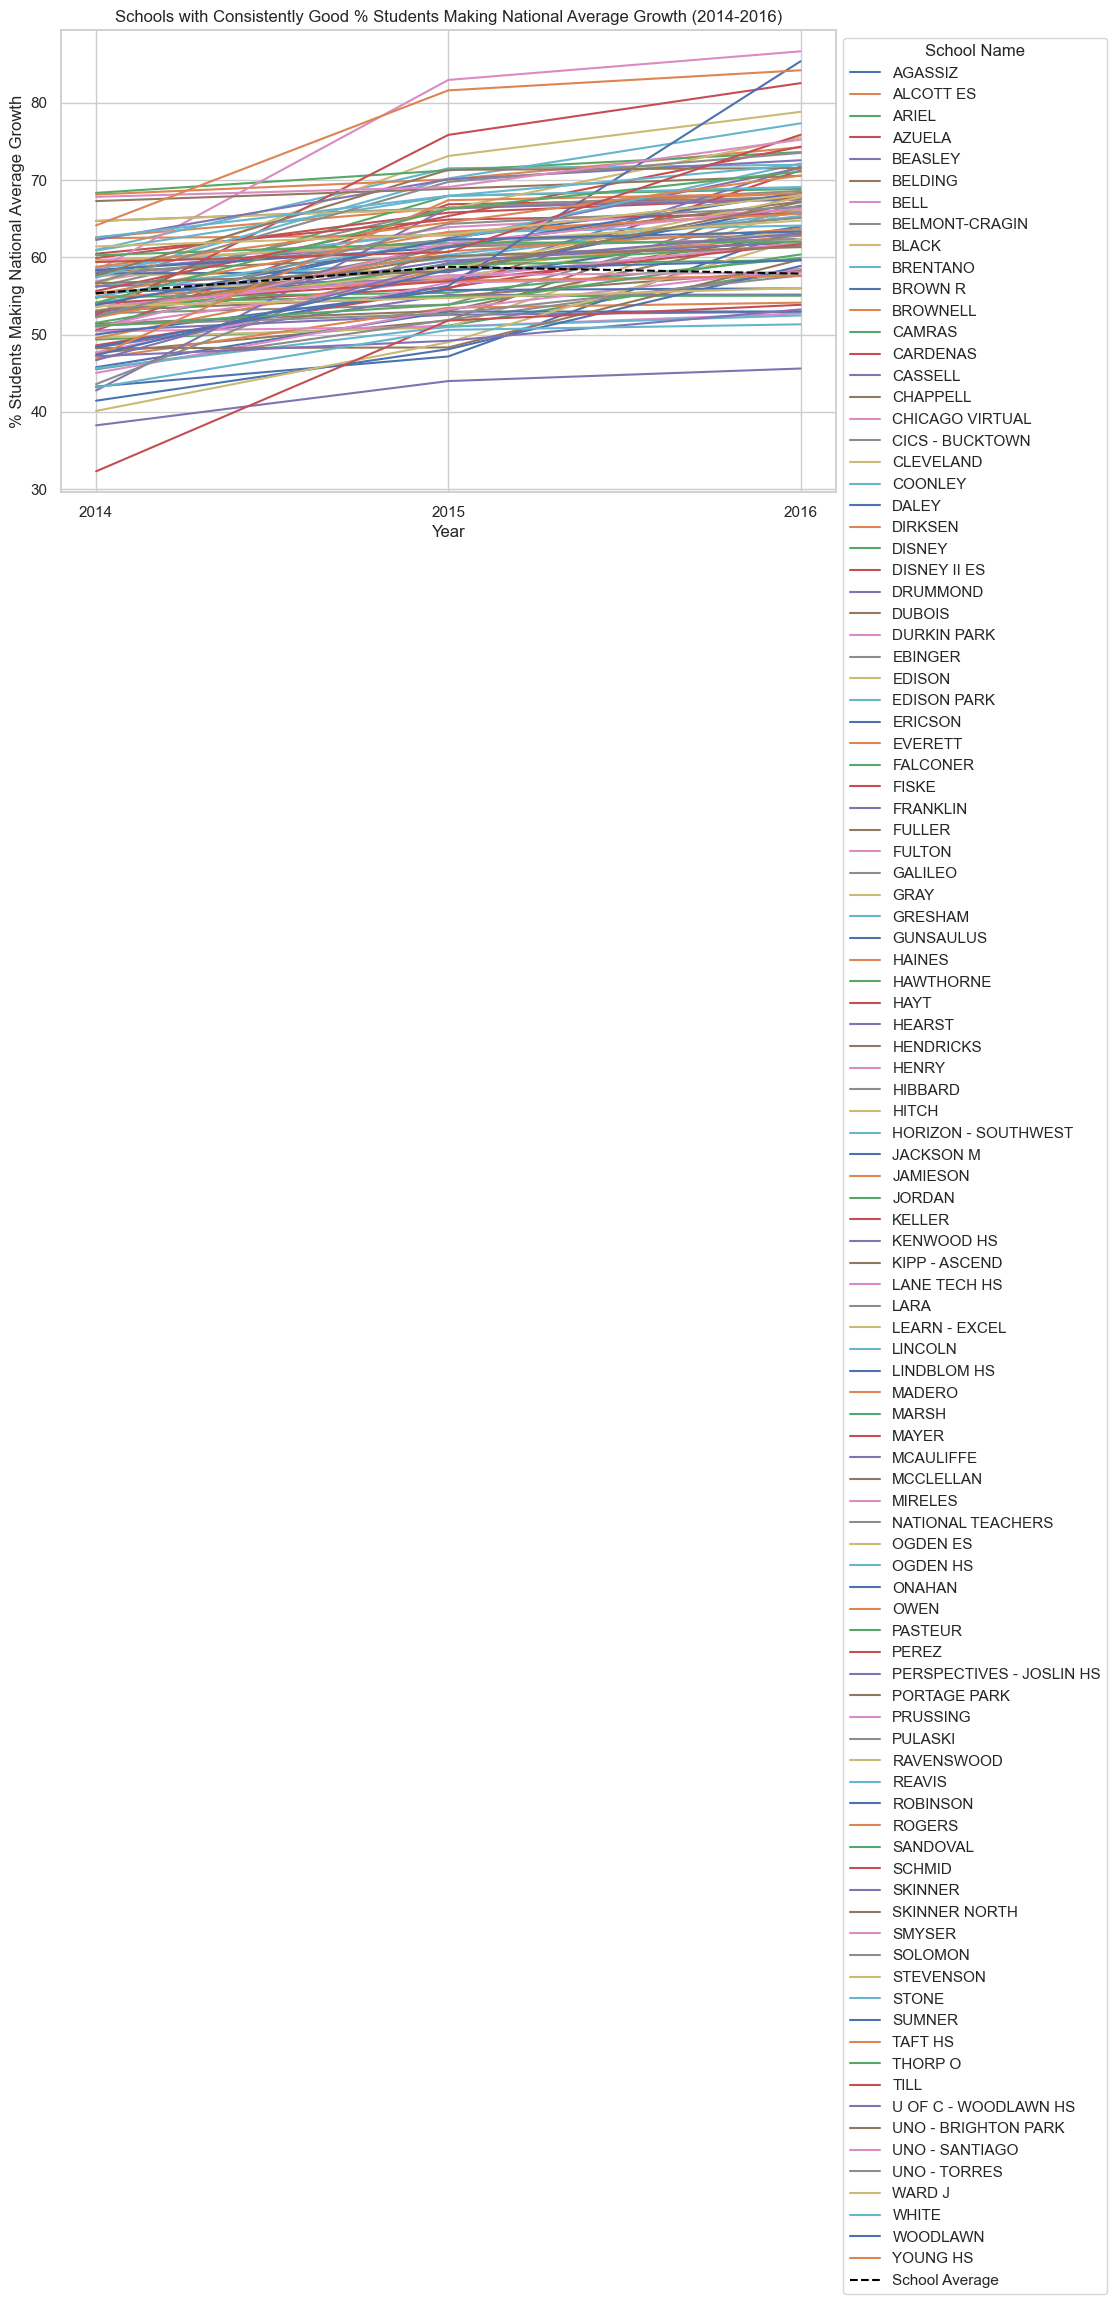

In [24]:
plt.figure(figsize=(10, 6))

# Plotting each school's average growth that is consistently good
for index, row in consistently_good_schools.iterrows():
    plt.plot(['2014', '2015', '2016'], row[1:], label=row['School Name'])

# Adding the overall school average line
plt.plot(['2014', '2015', '2016'], overall_avg_growth, label='School Average', color='black', linestyle='--')

# Adding titles and labels
plt.title('Schools with Consistently Good % Students Making National Average Growth (2014-2016)')
plt.xlabel('Year')
plt.ylabel('% Students Making National Average Growth')
plt.legend(title='School Name', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


#### The result is too messy and hard to visualize. Let's do it by network

# Exploration by Network 

In [25]:
# How many networks are there? 
number_of_networks = nwda_growth_df['Network'].nunique()

number_of_networks


17

In [27]:
# Prepare data for plotting
traces = []
# Step 1: Data Preparation
# Calculate the mean '% Students Making National Average Growth' for each network and each year
network_avg_growth = nwda_growth_df.groupby('Network')[['2014 % Students Making National Average Growth', 
                                              '2015 % Students Making National Average Growth', 
                                              '2016 % Students Making National Average Growth']].mean().reset_index()

# Plotting each network's average growth as a separate line in the plot
for index, row in network_avg_growth.iterrows():
    trace = go.Scatter(
        x=['2014', '2015', '2016'],
        y=row[['2014 % Students Making National Average Growth', '2015 % Students Making National Average Growth', '2016 % Students Making National Average Growth']],
        mode='lines+markers',
        name=row['Network']
    )
    traces.append(trace)

# Adding the overall network average line
average_line = go.Scatter(
    x=['2014', '2015', '2016'],
    y=overall_avg_growth,
    mode='lines',
    name='Network Average',
    line=dict(color='black', dash='dash')
)

traces.append(average_line)

layout = go.Layout(
    title='% Students Making National Average Growth on NWEA (2014-2016)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='% Students Making National Average Growth'),
    legend=dict(x=1, y=1)
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)


# Focusing only on the Newtorks that have been going up! 

In [28]:
# Identify networks with increasing growth for three years straight
increasing_growth_networks = network_avg_growth[
    (network_avg_growth['2014 % Students Making National Average Growth'] < network_avg_growth['2015 % Students Making National Average Growth']) & 
    (network_avg_growth['2015 % Students Making National Average Growth'] < network_avg_growth['2016 % Students Making National Average Growth'])
]

# Display the networks with increasing growth
increasing_growth_networks


,Network,2014 % Students Making National Average Growth,2015 % Students Making National Average Growth,2016 % Students Making National Average Growth
3,ISP,57.637952,63.181928,64.651807
4,Network 1,56.847699,62.178452,64.924059
10,Network 3,55.843939,56.779545,57.301515
11,Network 4,55.087678,61.672038,62.110664
14,Network 7,54.904211,56.603509,57.498596
16,Network 9,52.581915,55.004255,58.522340


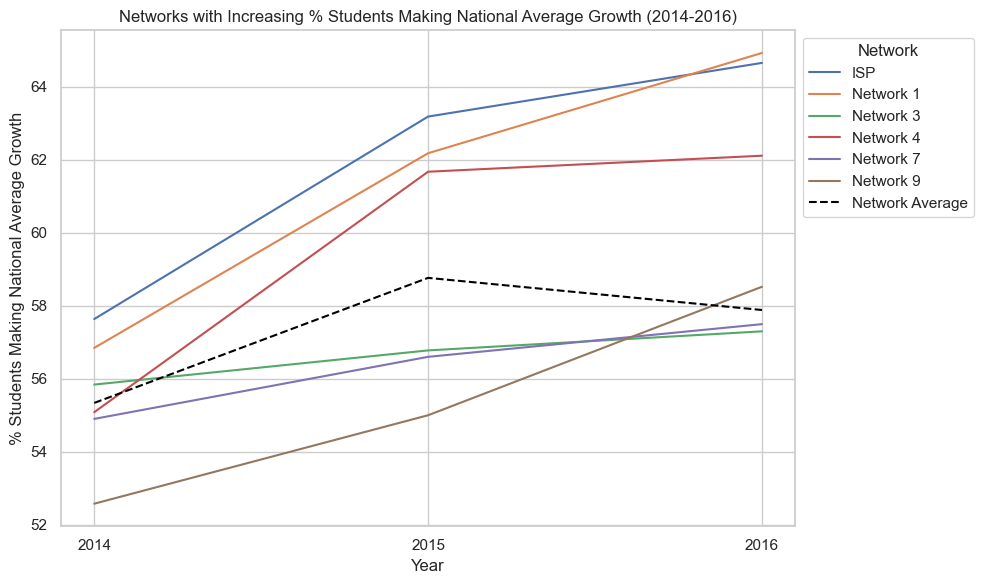

In [29]:
plt.figure(figsize=(10, 6))

# Plotting each network's average growth that is increasing
for index, row in increasing_growth_networks.iterrows():
    plt.plot(['2014', '2015', '2016'], row[1:], label=row['Network'])

# Adding the overall network average line
plt.plot(['2014', '2015', '2016'], overall_avg_growth, label='Network Average', color='black', linestyle='--')

# Adding titles and labels
plt.title('Networks with Increasing % Students Making National Average Growth (2014-2016)')
plt.xlabel('Year')
plt.ylabel('% Students Making National Average Growth')
plt.legend(title='Network', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# Focusing on Network 12

In [30]:
#How many schools in Network 12? 
# Filter the DataFrame for Network 12
network_12_data = nwda_growth_df[nwda_growth_df['Network'] == 'Network 12']

# Count the number of unique schools in Network 12
number_of_schools_network_12 = network_12_data['School Name'].nunique()  # or 'School ID' if that's the unique identifier

number_of_schools_network_12


30

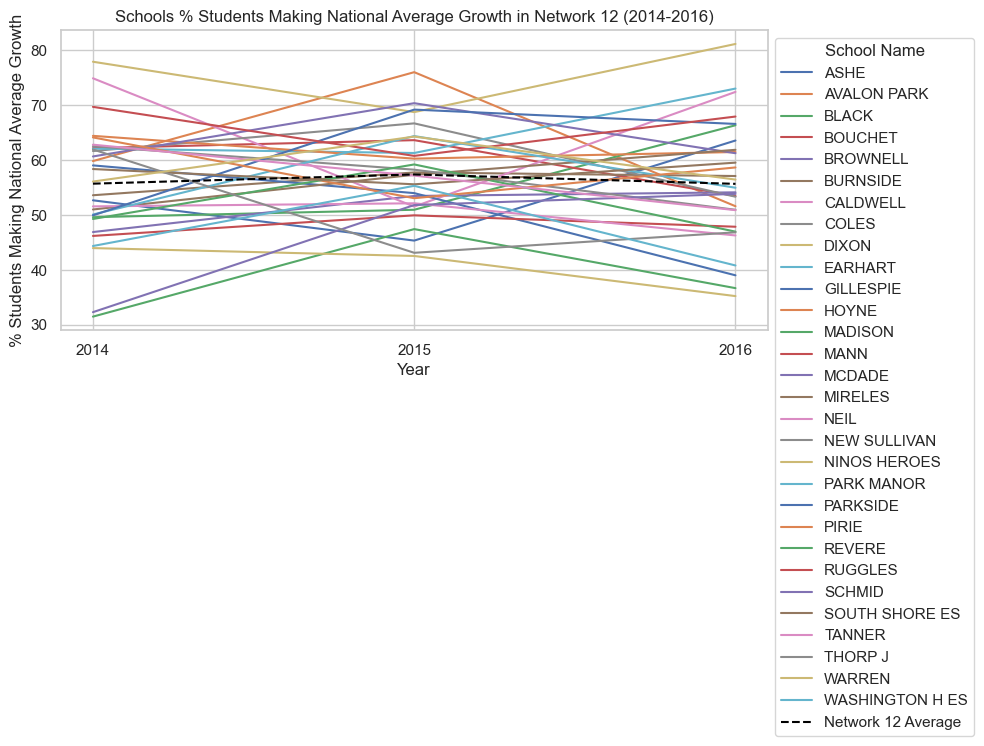

In [31]:
# Step 1: Filter the DataFrame for Network 12
network_12_data = nwda_growth_df[nwda_growth_df['Network'] == 'Network 12']

# Step 2: Data Preparation for Network 12
# Calculate the mean '% Students Making National Average Growth' for each school and each year in Network 12
school_avg_growth_network_12 = network_12_data.groupby('School Name')[['2014 % Students Making National Average Growth', 
                                                                      '2015 % Students Making National Average Growth', 
                                                                      '2016 % Students Making National Average Growth']].mean().reset_index()

# Step 3: Plot the Results for Network 12
plt.figure(figsize=(10, 6))

# Plotting each school's average growth in Network 12
for index, row in school_avg_growth_network_12.iterrows():
    plt.plot(['2014', '2015', '2016'], row[1:], label=row['School Name'])

# Adding the overall school average line for Network 12
plt.plot(['2014', '2015', '2016'], school_avg_growth_network_12[['2014 % Students Making National Average Growth', 
                                                                 '2015 % Students Making National Average Growth', 
                                                                 '2016 % Students Making National Average Growth']].mean(), label='Network 12 Average', color='black', linestyle='--')

# Adding titles and labels
plt.title('Schools % Students Making National Average Growth in Network 12 (2014-2016)')
plt.xlabel('Year')
plt.ylabel('% Students Making National Average Growth')
plt.legend(title='School Name', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## Let's make it interactive! All of Network 12 Schools

In [32]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# Prepare data for plotting
traces = []
for index, row in school_avg_growth_network_12.iterrows():
    trace = go.Scatter(
        x=['2014', '2015', '2016'],
        y=row[1:],
        mode='lines+markers',
        name=row['School Name']
    )
    traces.append(trace)

# Overall Network 12 Average line
average_line = go.Scatter(
    x=['2014', '2015', '2016'],
    y=school_avg_growth_network_12[['2014 % Students Making National Average Growth', 
                                    '2015 % Students Making National Average Growth', 
                                    '2016 % Students Making National Average Growth']].mean(),
    mode='lines',
    name='Network 12 Average',
    line=dict(color='black', dash='dash')
)

traces.append(average_line)

layout = go.Layout(
    title='Schools % Students Making National Average Growth in Network 12 (2014-2016)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='% Students Making National Average Growth'),
    legend=dict(x=1, y=1)
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)


# Focusing on Network 12 schools with consistently good performance for three years straight

In [33]:
# Filter the DataFrame for Network 12
network_12_data = nwda_growth_df[nwda_growth_df['Network'] == 'Network 12']


In [34]:
# Calculate the mean '% Students Making National Average Growth' for each school and each year in Network 12
school_avg_growth_network_12 = network_12_data.groupby('School Name')[['2014 % Students Making National Average Growth', 
                                                                      '2015 % Students Making National Average Growth', 
                                                                      '2016 % Students Making National Average Growth']].mean().reset_index()


In [35]:
# Identify schools with consistently good performance for three years straight in Network 12
consistently_good_schools_network_12 = school_avg_growth_network_12[
    (school_avg_growth_network_12['2014 % Students Making National Average Growth'] < school_avg_growth_network_12['2015 % Students Making National Average Growth']) & 
    (school_avg_growth_network_12['2015 % Students Making National Average Growth'] < school_avg_growth_network_12['2016 % Students Making National Average Growth'])
]


In [39]:
#init_notebook_mode(connected=True)

# Prepare data for plotting
traces = []

# Plotting each school's average growth that is consistently good in Network 12
for index, row in consistently_good_schools_network_12.iterrows():
    trace = go.Scatter(
        x=['2014', '2015', '2016'],
        y=row[['2014 % Students Making National Average Growth', '2015 % Students Making National Average Growth', '2016 % Students Making National Average Growth']],
        mode='lines+markers',
        name=row['School Name'],
        marker=dict(size=10)  
    )
    traces.append(trace)

# Adding the overall school average line for Network 12
average_line = go.Scatter(
    x=['2014', '2015', '2016'],
    y=network_12_avg,
    mode='lines',
    name='Network 12 Average',
    line=dict(color='black', dash='dash', width=2) 
)

traces.append(average_line)

layout = go.Layout(
    title='Schools with Consistently Good % Students Making National Average Growth in Network 12 (2014-2016)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='% Students Making National Average Growth'),
    legend=dict(x=1, y=1),
    hovermode='closest'
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)


# Focusing on Network 12 with consistent negative performance for three years straight

In [40]:
# Identify schools with a negative growth trend for three years straight in Network 12
downward_trend_schools_network_12 = school_avg_growth_network_12[
    (school_avg_growth_network_12['2014 % Students Making National Average Growth'] > school_avg_growth_network_12['2015 % Students Making National Average Growth']) & 
    (school_avg_growth_network_12['2015 % Students Making National Average Growth'] > school_avg_growth_network_12['2016 % Students Making National Average Growth'])
]


In [42]:
# Prepare data for plotting
traces = []
for index, row in downward_trend_schools_network_12.iterrows():
    trace = go.Scatter(
        x=['2014', '2015', '2016'],
        y=row[1:],
        mode='lines+markers',
        name=row['School Name'],
        hoverinfo='name+y+x'  # Show school name, year, and percentage in the tooltip
    )
    traces.append(trace)

# Overall Network 12 Average line for comparison
average_line = go.Scatter(
    x=['2014', '2015', '2016'],
    y=school_avg_growth_network_12[['2014 % Students Making National Average Growth', 
                                    '2015 % Students Making National Average Growth', 
                                    '2016 % Students Making National Average Growth']].mean(),
    mode='lines',
    name='Network 12 Average',
    line=dict(color='black', dash='dash')
)

traces.append(average_line)

layout = go.Layout(
    title='Schools with Consistent Underperformance in Network 12 (2014-2016)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='% Students Making National Average Growth'),
    legend=dict(x=1, y=1)
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)